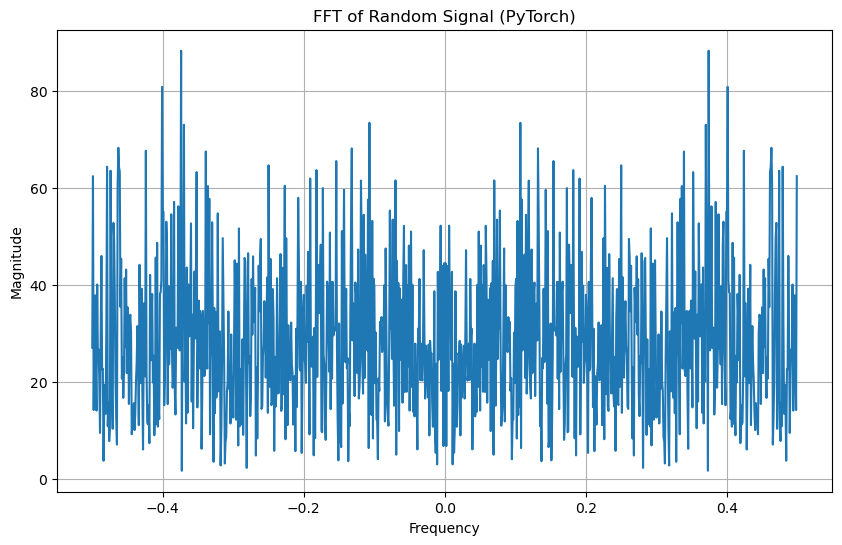

In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate a random signal
torch.manual_seed(0)  # for reproducibility
signal_length = 1000
random_signal = torch.randn(signal_length)

# Compute FFT
fft_result = torch.fft.fft(random_signal)

# Compute the frequencies corresponding to the FFT result
frequencies_sorted = torch.fft.fftfreq(signal_length).numpy()
fft_result_sorted = torch.abs(fft_result).numpy()
sort_indices = np.argsort(frequencies_sorted)
frequencies_sorted = frequencies_sorted[sort_indices]
fft_result_sorted = fft_result_sorted[sort_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(frequencies_sorted, fft_result_sorted)
plt.title('FFT of Random Signal (PyTorch)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

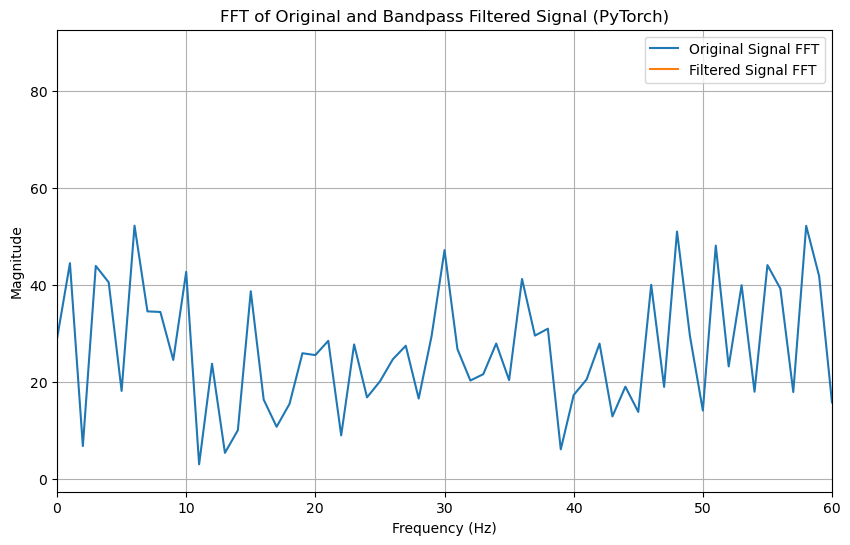

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Generate a random signal
torch.manual_seed(0)  # for reproducibility
signal_length = 1000
random_signal = torch.randn(signal_length)

# Compute FFT of the signal
fft_result = torch.fft.fft(random_signal)

# Define filter parameters
fs = 1000  # Sampling frequency
nyquist = fs / 2  # Nyquist frequency
low_cutoff = 10.0  # Low cutoff frequency
high_cutoff = 20.0  # High cutoff frequency
filter_order = 4  # Filter order

# Design bandpass filter using butterworth filter from scipy
b, a = signal.butter(filter_order, [low_cutoff / nyquist, high_cutoff / nyquist], btype='band')
b_coeffs = torch.tensor(b, dtype=torch.float32)
a_coeffs = torch.tensor(a, dtype=torch.float32)

# Apply the filter using torchaudio.functional.lfilter
filtered_signal = torchaudio.functional.lfilter(random_signal.unsqueeze(0), a_coeffs.unsqueeze(0), b_coeffs.unsqueeze(0))

# Compute FFT of the filtered signal
fft_filtered_result = torch.fft.fft(filtered_signal.squeeze())

# Compute the frequencies corresponding to the FFT result
frequencies = torch.fft.fftfreq(signal_length, 1.0 / fs)

fft_result = torch.abs(fft_result).numpy()
fft_filtered_result = torch.abs(fft_filtered_result).numpy()
sort_indices = np.argsort(frequencies)
frequencies_sorted = frequencies[sort_indices]
fft_result_sorted = fft_result[sort_indices]
fft_filtered_result_sorted = fft_filtered_result[sort_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(frequencies_sorted.numpy(), fft_result_sorted, label='Original Signal FFT')
plt.plot(frequencies_sorted.numpy(), fft_filtered_result_sorted, label='Filtered Signal FFT')
plt.title('FFT of Original and Bandpass Filtered Signal (PyTorch)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 60)  # Limiting x-axis for better visualization
plt.legend()
plt.grid(True)
plt.show()


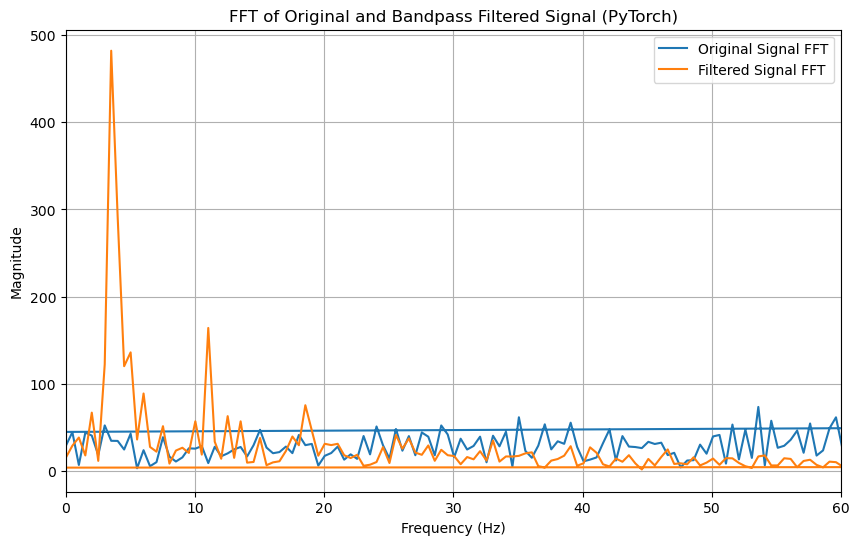

In [56]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import torchaudio.functional as F

# Generate a random signal
torch.manual_seed(0)  # for reproducibility
signal_length = 1000
random_signal = torch.randn(signal_length)

# Compute FFT of the signal
fft_result = torch.fft.fft(random_signal)

# Define filter parameters
fs = 501  # Sampling frequency
nyquist = fs / 2  # Nyquist frequency
low_cutoff = 1  # Low cutoff frequency
high_cutoff = 40  # High cutoff frequency
filter_order = 4  # Filter order

# Design bandpass filter using butterworth filter from scipy
b, a = signal.butter(filter_order, [low_cutoff / nyquist, high_cutoff / nyquist], btype='band')
b_coeffs = torch.tensor(b, dtype=torch.float32)
a_coeffs = torch.tensor(a, dtype=torch.float32)

# Apply the filter using torchaudio.functional.lfilter
filtered_signal = F.lfilter(random_signal.unsqueeze(0), a_coeffs.unsqueeze(0), b_coeffs.unsqueeze(0))

# Compute FFT of the filtered signal
fft_filtered_result = torch.fft.fft(filtered_signal.squeeze())

# Compute the frequencies corresponding to the FFT result
frequencies = torch.fft.fftfreq(signal_length, 1.0 / fs)

fft_result = torch.abs(fft_result).numpy()
fft_filtered_result = torch.abs(fft_filtered_result).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(frequencies.numpy(), fft_result, label='Original Signal FFT')
plt.plot(frequencies.numpy(), fft_filtered_result, label='Filtered Signal FFT')
plt.title('FFT of Original and Bandpass Filtered Signal (PyTorch)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 60)  # Limiting x-axis for better visualization
plt.legend()
plt.grid(True)
plt.show()

In [118]:
from experiments.speed_rom.dataset import KFoldDatasets

kf_datasets = KFoldDatasets(
    data_dir="data/speed_rom",
    k=4,
    val_percent=0.15,
    motion_type="Disc"
)

x = kf_datasets[0][0][5]["epoch_data"]
print(x.shape)

x = torch.tensor(x).unsqueeze(0)
x = x.permute(0, 2, 1)
print(x.shape)

Loading data: 100%|██████████| 28/28 [00:11<00:00,  2.48it/s]


(501, 4)
torch.Size([1, 501, 4])


In [119]:
from julius.filters import bandpass_filter

fs = 501

delta_thresh = (0.5, 4)
theta_thresh = (4, 7)
alpha_thresh = (8, 12)
sigma_thresh = (12, 16)
beta_thresh = (13, 30)

delta_band = bandpass_filter(x, delta_thresh[0]/fs, delta_thresh[1]/fs)
theta_band = bandpass_filter(x, theta_thresh[0]/fs, theta_thresh[1]/fs)
alpha_band = bandpass_filter(x, alpha_thresh[0]/fs, alpha_thresh[1]/fs)
sigma_band = bandpass_filter(x, sigma_thresh[0]/fs, sigma_thresh[1]/fs)
beta_band = bandpass_filter(x, beta_thresh[0]/fs, beta_thresh[1]/fs)

print(x)
print(delta_band)

tensor([[[ 1.3211,  0.3528,  0.8672, -6.8360],
         [-2.6722, -3.3049,  0.2138, -8.1170],
         [-5.7845, -6.0954, -0.6256, -8.4715],
         ...,
         [16.4218, 13.8518,  7.2716,  6.2351],
         [13.8307, 11.6992,  4.4597,  6.2889],
         [10.8621,  9.1550,  1.8426,  6.1854]]], dtype=torch.float64)
tensor([[[ 0.2648,  0.1510,  0.0371, -0.0768],
         [ 0.2214,  0.1455,  0.0695, -0.0066],
         [ 0.1614,  0.1240,  0.0865,  0.0489],
         ...,
         [ 0.1920,  0.0497, -0.0926, -0.2348],
         [ 0.1027, -0.0026, -0.1080, -0.2133],
         [ 0.0136, -0.0518, -0.1172, -0.1824]]], dtype=torch.float64)


In [120]:
# x = beta_band[0].numpy()

# # Sample rate and duration
# fs = 501  # Sampling frequency (Hz)
# T = 1/fs   # Sampling period (s)
# duration = 1  # Duration of the signal (s)

# # Generate time vector
# t = np.arange(0, duration, T)



# # Perform FFT
# X = np.fft.fft(x)
# freqs = np.fft.fftfreq(len(x), d=T)

# # Filter frequencies between 0 and 40 Hz
# mask = (freqs >= 0) & (freqs <= 40)
# filtered_freqs = freqs[mask]
# filtered_X = X[mask]

# # Plot
# plt.figure()
# plt.plot(filtered_freqs, np.abs(filtered_X))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.title('FFT of a Sine Wave (0-40 Hz)')
# plt.grid(True)
# plt.show()

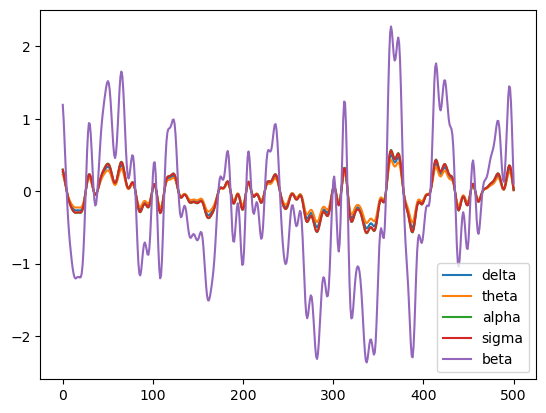

In [123]:
# plt.plot(np.arange(1000), x[0])
plt.plot(np.arange(501), delta_band[0,:,0], label="delta")
plt.plot(np.arange(501), theta_band[0,:,0], label="theta")
plt.plot(np.arange(501), alpha_band[0,:,0], label="alpha")
plt.plot(np.arange(501), sigma_band[0,:,0], label="sigma")
plt.plot(np.arange(501), beta_band[0,:,0], label="beta")
plt.legend()
plt.show()

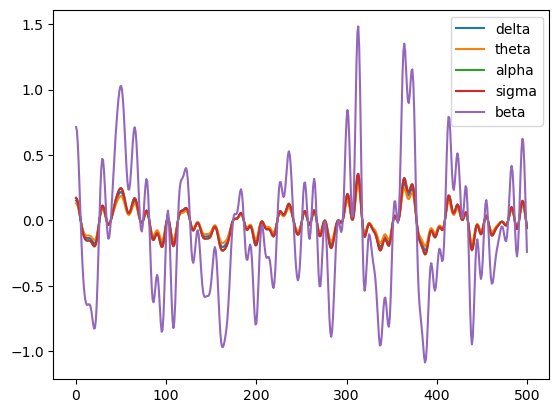

In [122]:
# plt.plot(np.arange(1000), x[0])
plt.plot(np.arange(501), delta_band[0,:,1], label="delta")
plt.plot(np.arange(501), theta_band[0,:,1], label="theta")
plt.plot(np.arange(501), alpha_band[0,:,1], label="alpha")
plt.plot(np.arange(501), sigma_band[0,:,1], label="sigma")
plt.plot(np.arange(501), beta_band[0,:,1], label="beta")
plt.legend()
plt.show()